<a href="https://colab.research.google.com/github/IsraelEvangelista/Desafio-Primeiro_Repositorio-DIO/blob/main/An%C3%A1lise_da_Efic%C3%A1cia_de_Medicamentos_Simula%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade

Demonstrando o Entendimento do Método Científico

**Objetivo**

Avaliar o entendimento do método científico, etapas e aplicação na investigação

**Etapas do estudo**

- **Análise Exploratória:** Simular um cenário e identificar o problema científico e sua relevância.
- **Formulação da Hipótese:** Estabelecer uma previsão testável baseada na compreensão do problema.
- **Testes Estatísticos:** Utilizar estatísticas descritivas para explorar os dados originais.
- **Testes por Amostragem e Análise Probabilística** Gerar um novo conjunto de dados para análises mais robustas e aplicar testes estatísticos para validar a hipótese.
- **Interpretação de Resultados:** Sumarizar as descobertas e refletir sobre o significado dos resultados no contexto mais amplo.

# Etapa 1: Análise Exploratória

### Importação das bibliotecas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Pandas:** Esta biblioteca é essencial para manipulação e análise de dados. No nosso projeto, usaremos o Pandas para ler o arquivo Excel, criar e manipular o DataFrame, o que inclui filtrar, ordenar e agregar dados.

**NumPy:** É uma biblioteca fundamental para a computação científica com Python. Utilizaremos o NumPy principalmente para realizar operações matemáticas e numéricas com nossos dados.

**Matplotlib e Seaborn:** Ambas são bibliotecas de visualização de dados. O Matplotlib é ótimo para criar gráficos personalizados, enquanto o Seaborn, que é construído em cima do Matplotlib, oferece uma interface fantástica para desenhar gráficos estatísticos e informativos. Essas ferramentas serão essenciais para entender melhor as tendências e padrões.

**Sklearn (Scikit-learn):** Esta é uma biblioteca de _machine learning_ que utilizaremos para o pré-processamento de dados. Em particular, usaremos o LabelEncoder para converter variáveis categóricas em numéricas e o StandardScaler para normalizar os dados, o que é importante para preparar o dataset para análises e modelos de ML.

### Importação dos dados

In [18]:
df = pd.read_excel('/content/drive/MyDrive/pacientes_estudo_medicamento.xlsx')

### Análise Inicial

In [19]:
df.head(5)

,Paciente,Efeitos Colaterais,Idade,Duração do Tratamento (dias),Dosagem do Medicamento (mg),Hábitos de Vida,Eficácia do Medicamento
0,Paciente 1,Graves,70,75,200,Fuma e Bebe,Baixa
1,Paciente 2,Leves,35,13,100,Não Fuma/Não Bebe,Alta
2,Paciente 3,Graves,33,54,200,Bebe,Alta
3,Paciente 4,Leves,22,134,50,Fuma e Bebe,Moderada
4,Paciente 5,Nenhum,59,138,100,Não Fuma/Não Bebe,Moderada


In [20]:
df.dtypes

Paciente                        object
Efeitos Colaterais              object
Idade                            int64
Duração do Tratamento (dias)     int64
Dosagem do Medicamento (mg)      int64
Hábitos de Vida                 object
Eficácia do Medicamento         object
dtype: object

In [21]:
df.describe()

,Idade,Duração do Tratamento (dias),Dosagem do Medicamento (mg)
count,30.000000,30.000000,30.000000
mean,48.966667,98.200000,113.333333
std,19.223698,47.411915,61.494790
min,18.000000,7.000000,50.000000
25%,32.250000,55.250000,50.000000
50%,53.000000,101.500000,100.000000
75%,63.000000,137.000000,200.000000
max,76.000000,176.000000,200.000000


In [22]:
df.isnull().sum()

Paciente                        0
Efeitos Colaterais              0
Idade                           0
Duração do Tratamento (dias)    0
Dosagem do Medicamento (mg)     0
Hábitos de Vida                 0
Eficácia do Medicamento         0
dtype: int64

In [23]:
# Transformando variáveis categóricas em numéricas

df['Eficácia do Medicamento'] = df['Eficácia do Medicamento'].map({'Alta': 2, 'Moderada': 1, 'Baixa': 0})
df['Efeitos Colaterais'] = df['Efeitos Colaterais'].map({'Graves': 3, 'Moderados': 2, 'Leves': 1, 'Nenhum': 0})
df['Hábitos de Vida'] = df['Hábitos de Vida'].map({'Não Fuma/Não Bebe': 0, 'Bebe': 1, 'Fuma': 2, 'Fuma e Bebe': 3})

In [24]:
df.head(5)

,Paciente,Efeitos Colaterais,Idade,Duração do Tratamento (dias),Dosagem do Medicamento (mg),Hábitos de Vida,Eficácia do Medicamento
0,Paciente 1,3,70,75,200,3,0
1,Paciente 2,1,35,13,100,0,2
2,Paciente 3,3,33,54,200,1,2
3,Paciente 4,1,22,134,50,3,1
4,Paciente 5,0,59,138,100,0,1


<ipython-input-25-73b9befbf8e0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


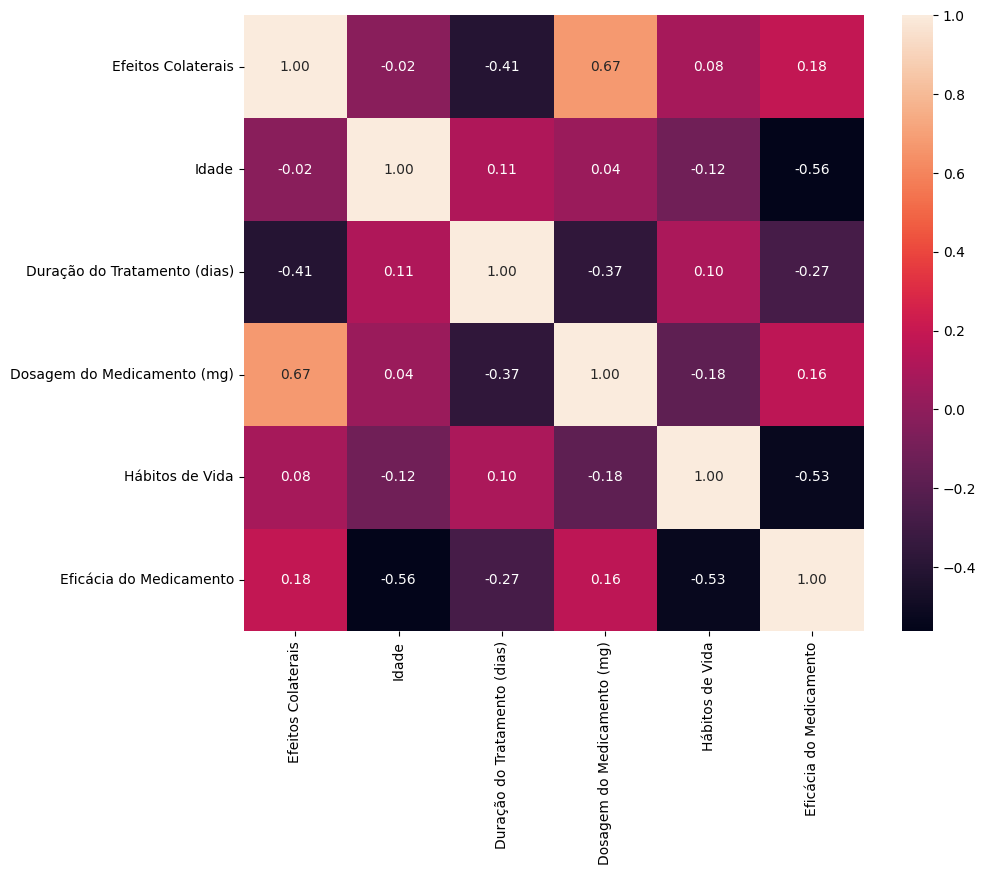

In [25]:
# Análise de correlação

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Etapa 2: Formulação da Hipótese

- Definição da Hipótese

**Hipótese:**

_A dosagem do medicamento tem um impacto significativo nos efeitos colaterais, com dosagens mais altas aumentando a probabilidade de efeitos colaterais graves. Além disso, hábitos de vida saudáveis, caracterizados por não fumar e não beber, estão positivamente correlacionados com a eficácia do tratamento, sugerindo que tais hábitos podem melhorar a resposta ao medicamento_

Esta hipótese é derivada das seguintes observações na matriz de correlação:

**Dosagem do Medicamento e Efeitos Colaterais:** Uma correlação positiva significativa (0.67) indica uma forte associação entre dosagens mais altas e efeitos colaterais mais graves.

**Hábitos de Vida e Eficácia do Medicamento:** Uma correlação negativa significativa (-0.53) sugere que hábitos de vida não saudáveis podem estar inversamente relacionados à eficácia do tratamento.

**Justificativa:**

A hipótese é baseada em uma análise preliminar dos dados, onde padrões iniciais indicam uma relação potencial entre as variáveis de interesse. A validação desta hipótese por meio de testes estatísticos e análise exploratória subsequente pode fornecer insights valiosos para a prescrição de medicamentos e recomendações de estilo de vida para pacientes, potencialmente levando a tratamentos mais eficazes e com menos efeitos colaterais adversos.

**Contexto do Estudo:**

O estudo busca explorar a complexa interação entre dosagem do medicamento, efeitos colaterais e hábitos de vida dos pacientes, visando otimizar os resultados do tratamento com o medicamento X1. A hipótese será testada utilizando métodos estatísticos apropriados para determinar a força e significância das associações observadas.

- Gráfico de Dispersão

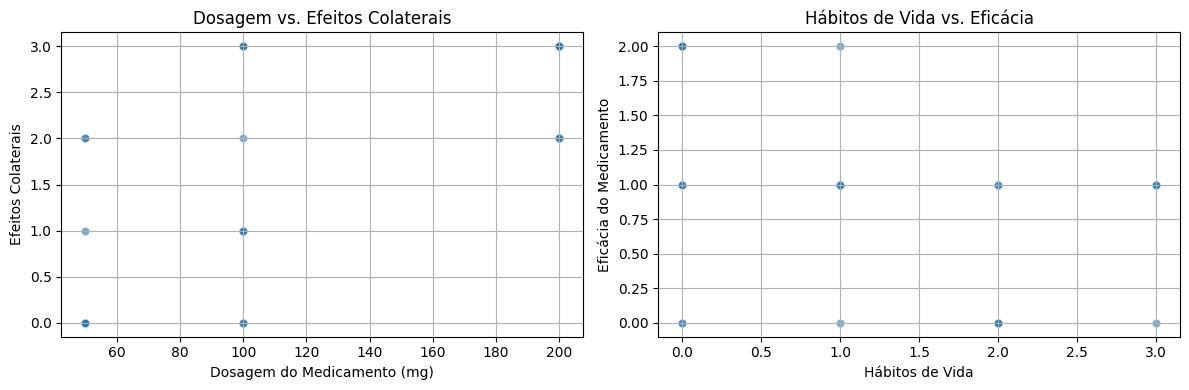

In [26]:
plt.figure(figsize=(12, 4))

# Gráfico de dispersão para Dosagem do Medicamento vs. Efeitos Colaterais
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Dosagem do Medicamento (mg)', y='Efeitos Colaterais', alpha=0.6)
plt.title('Dosagem vs. Efeitos Colaterais')
plt.xlabel('Dosagem do Medicamento (mg)')
plt.ylabel('Efeitos Colaterais')
plt.grid(True)

# Gráfico de dispersão para Hábitos de Vida vs. Eficácia do Medicamento
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Hábitos de Vida', y='Eficácia do Medicamento', alpha=0.6)
plt.title('Hábitos de Vida vs. Eficácia')
plt.xlabel('Hábitos de Vida')
plt.ylabel('Eficácia do Medicamento')
plt.grid(True)

# Ajustando layout para evitar sobreposição de títulos e eixos
plt.tight_layout()
plt.show()

**Dosagem vs. Efeitos Colaterais:**

- Os pontos podem mostrar uma tendência de aumento nos efeitos colaterais com o aumento da dosagem, o que apoiaria a hipótese de que dosagens mais altas estão associadas a efeitos colaterais mais graves.

- Se os pontos estiverem amplamente distribuídos verticalmente em dosagens mais altas, isso pode indicar que há uma variabilidade significativa na resposta dos pacientes à dosagem, o que é consistente com os insights do boxplot.

**Hábitos de Vida vs. Eficácia:**

- Se os pontos mostrarem que pacientes com hábitos de vida mais saudáveis (por exemplo, não fumar e não beber) tendem a ter pontos mais altos no eixo da eficácia, isso apoia a hipótese de que hábitos de vida saudáveis melhoram a eficácia do medicamento.

- A distribuição dos pontos pode indicar se existe uma tendência clara ou se os resultados são mais heterogêneos entre indivíduos com diferentes hábitos de vida.

- Gráfico de Caixa (Boxplot)

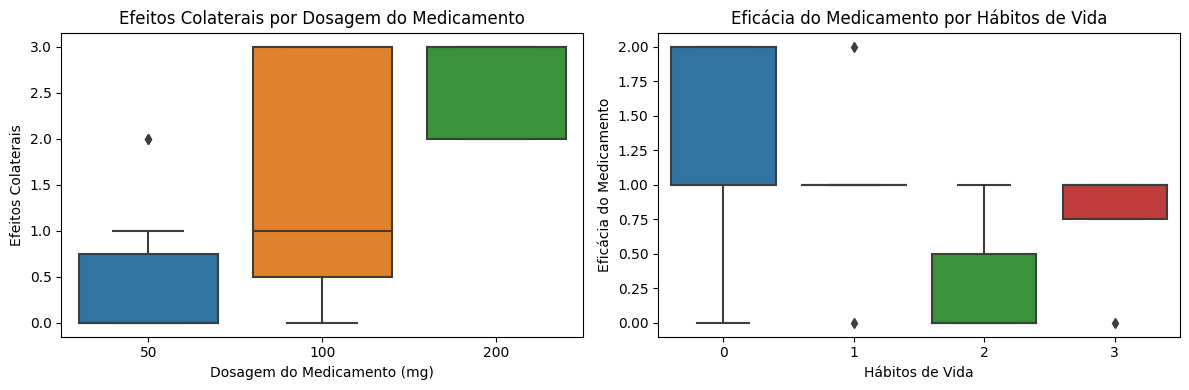

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Dosagem do Medicamento (mg)', y='Efeitos Colaterais')
plt.title('Efeitos Colaterais por Dosagem do Medicamento')

# Boxplot para visualizar a relação entre hábitos de vida e eficácia do medicamento
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Hábitos de Vida', y='Eficácia do Medicamento')
plt.title('Eficácia do Medicamento por Hábitos de Vida')

plt.tight_layout()
plt.show()

**Efeitos Colaterais por Dosagem do Medicamento:**

- A mediana e a amplitude dos efeitos colaterais parecem aumentar com a dosagem do medicamento. Isso sugere uma relação positiva entre a dosagem e a gravidade dos efeitos colaterais.

- A presença de outliers, especialmente em dosagens mais altas, pode indicar que, para alguns pacientes, os efeitos colaterais são excepcionalmente graves, o que merece uma análise mais aprofundada.

- A variabilidade nos efeitos colaterais também parece aumentar com a dosagem, indicando uma resposta mais inconsistente em dosagens mais altas.

**Eficácia do Medicamento por Hábitos de Vida:**

- Os hábitos de vida têm diferentes distribuições de eficácia do medicamento. Por exemplo, pacientes que não fumam e não bebem podem ter uma mediana de eficácia mais alta comparada com outros grupos.

- Existem outliers em todos os grupos de hábitos de vida, o que indica que há exceções onde a eficácia do medicamento é baixa ou alta, independentemente dos hábitos de vida.

- A amplitude interquartil (a caixa no boxplot) e os whiskers (linhas que se estendem da caixa) variam entre os grupos, o que pode sugerir diferenças na consistência da resposta ao medicamento.

# Etapa 3: Testes Estatísticos

- Correlação de Spearman

In [28]:
import scipy.stats as stats

In [29]:
# Realizar o Teste de Correlação de Spearman para Dosagem do Medicamento e Efeitos Colaterais
coeficiente_corr_dosagem_ec, p_valor_dosagem_ec = stats.spearmanr(df['Dosagem do Medicamento (mg)'], df['Efeitos Colaterais'])
print(f"Correlação de Spearman - Dosagem do Medicamento vs. Efeitos Colaterais:\nCoeficiente de Correlação: {coeficiente_corr_dosagem_ec:.3f}, P-valor: {p_valor_dosagem_ec:.3f}")

# Realizar o Teste de Correlação de Spearman para Hábitos de Vida e Eficácia do Medicamento
coeficiente_corr_habitos_eficacia, p_valor_habitos_eficacia = stats.spearmanr(df['Hábitos de Vida'], df['Eficácia do Medicamento'])
print(f"Correlação de Spearman - Hábitos de Vida vs. Eficácia do Medicamento:\nCoeficiente de Correlação: {coeficiente_corr_habitos_eficacia:.3f}, P-valor: {p_valor_habitos_eficacia:.3f}")

Correlação de Spearman - Dosagem do Medicamento vs. Efeitos Colaterais:
Coeficiente de Correlação: 0.683, P-valor: 0.000
Correlação de Spearman - Hábitos de Vida vs. Eficácia do Medicamento:
Coeficiente de Correlação: -0.554, P-valor: 0.001


**Interpretando Resultados**

_Dosagem do Medicamento vs. Efeitos Colaterais:_

O coeficiente de correlação de Spearman é de 0.683, o que indica uma correlação positiva moderadamente forte entre a dosagem do medicamento e a gravidade dos efeitos colaterais. Em termos práticos, isso sugere que à medida que a dosagem do medicamento aumenta, os efeitos colaterais tendem a se tornar mais graves.
O p-valor associado a esta correlação é menor que 0.001, o que é muito menor do que o nível de significância padrão de 0.05. Isso indica que a correlação observada é estatisticamente significativa e que é muito improvável que tenha ocorrido por acaso.

_Hábitos de Vida vs. Eficácia do Medicamento:_

O coeficiente de correlação de Spearman é de -0.554, o que aponta para uma correlação negativa moderada entre os hábitos de vida dos pacientes e a eficácia do medicamento. Isso pode ser interpretado como uma indicação de que hábitos de vida considerados menos saudáveis (por exemplo, fumar e beber) estão associados a uma menor eficácia do tratamento.
O p-valor é de 0.001, sugerindo que essa correlação negativa também é estatisticamente significativa e não é provável que seja o resultado do acaso.

- Análise de Variância

**Justificativa para a Não Aplicação da ANOVA**

A tentativa de aplicar a Análise de Variância (ANOVA) em nosso estudo enfrentou um obstáculo significativo devido ao tamanho da amostra. Com apenas 30 registros e a divisão desses dados em categorias de dosagem, os grupos resultantes não tinham observações suficientes para realizar a ANOVA. Esta técnica requer um número adequado de dados em cada grupo para comparar as médias de forma significativa, e a falta de observações em nossos grupos categorizados tornou a análise impraticável. Portanto, decidimos não prosseguir com a ANOVA, optando por focar em métodos exploratórios e descritivos mais adequados para nosso conjunto de dados limitado.

- Teste Kruskal-Wallis

In [30]:
kruskal_result_dosagem_ec = stats.kruskal(df['Dosagem do Medicamento (mg)'], df['Efeitos Colaterais'])

print(f"Teste Kruskal-Wallis - Dosagem do Medicamento vs. Efeitos Colaterais:\n"
      f"Estátistica do Teste: {kruskal_result_dosagem_ec.statistic:.3f}, "
      f"P-valor: {kruskal_result_dosagem_ec.pvalue:.3f}")

# Realizar o Teste Kruskal-Wallis para Hábitos de Vida e Eficácia do Medicamento
kruskal_result_habitos_eficacia = stats.kruskal(df['Hábitos de Vida'], df['Eficácia do Medicamento'])

print(f"Teste Kruskal-Wallis - Hábitos de Vida vs. Eficácia do Medicamento:\n"
      f"Estátistica do Teste: {kruskal_result_habitos_eficacia.statistic:.3f}, "
      f"P-valor: {kruskal_result_habitos_eficacia.pvalue:.3f}")

Teste Kruskal-Wallis - Dosagem do Medicamento vs. Efeitos Colaterais:
Estátistica do Teste: 45.372, P-valor: 0.000
Teste Kruskal-Wallis - Hábitos de Vida vs. Eficácia do Medicamento:
Estátistica do Teste: 0.092, P-valor: 0.761


**Interpretando Resultados**

_Dosagem do Medicamento vs. Efeitos Colaterais:_

Estátistica do Teste: 45.372; P-valor: 0.000: Este resultado indica que existem diferenças estatisticamente significativas entre os grupos de dosagem do medicamento em relação aos efeitos colaterais. Um p-valor menor que 0.05 (neste caso, 0.000) sugere que pelo menos um dos grupos de dosagem tem uma mediana de efeitos colaterais significativamente diferente dos outros. Isso apoia a hipótese de que diferentes dosagens do medicamento estão associadas a diferentes níveis de efeitos colaterais.

_Hábitos de Vida vs. Eficácia do Medicamento:_

Estátistica do Teste: 0.092; P-valor: 0.761: Este resultado sugere que não existem diferenças estatisticamente significativas entre os diferentes hábitos de vida em relação à eficácia do medicamento. O p-valor alto (acima de 0.05) indica que não há evidências suficientes para afirmar que os hábitos de vida afetam a eficácia do medicamento de maneira significativa no seu conjunto de dados.

- Teste de Qui-quadrado

In [31]:
# Preparando a tabela de contingência para Dosagem vs. Efeitos Colaterais
contingencia_dosagem_ec = pd.crosstab(df['Dosagem do Medicamento (mg)'], df['Efeitos Colaterais'])

# Realizando o Teste de Qui-quadrado
chi2_dosagem_ec, p_dosagem_ec, dof_dosagem_ec, expected_dosagem_ec = stats.chi2_contingency(contingencia_dosagem_ec)

print(f"Teste de Qui-quadrado - Dosagem vs. Efeitos Colaterais:\nChi2 Valor: {chi2_dosagem_ec:.3f}, P-valor: {p_dosagem_ec:.3f}")

Teste de Qui-quadrado - Dosagem vs. Efeitos Colaterais:
Chi2 Valor: 17.859, P-valor: 0.007


In [32]:
# Preparando a tabela de contingência para Hábitos de Vida vs. Eficácia do Medicamento
contingency_habitos_eficacia = pd.crosstab(df['Hábitos de Vida'], df['Eficácia do Medicamento'])

# Realizando o Teste de Qui-quadrado
chi2_habitos_eficacia, p_habitos_eficacia, dof_habitos_eficacia, expected_habitos_eficacia = stats.chi2_contingency(contingency_habitos_eficacia)

print(f"Teste de Qui-quadrado - Hábitos de Vida vs. Eficácia do Medicamento:\nChi2 Valor: {chi2_habitos_eficacia:.3f}, P-valor: {p_habitos_eficacia:.3f}")

Teste de Qui-quadrado - Hábitos de Vida vs. Eficácia do Medicamento:
Chi2 Valor: 16.671, P-valor: 0.011


**Interpretando Resultados**

_Dosagem vs. Efeitos Colaterais:_

Chi2 Valor: 17.859; P-valor: 0.007: Este resultado indica que existe uma associação estatisticamente significativa entre a dosagem do medicamento e os efeitos colaterais. Um p-valor abaixo de 0.05 (neste caso, 0.007) sugere que as diferenças observadas nas categorias de efeitos colaterais não são aleatórias e estão associadas às diferentes dosagens de medicamento. Isso reforça a hipótese de que a dosagem do medicamento influencia os efeitos colaterais, com dosagens mais altas possivelmente levando a efeitos mais graves.

_Hábitos de Vida vs. Eficácia do Medicamento:_

Chi2 Valor: 16.671; P-valor: 0.011: Este resultado também indica uma associação estatisticamente significativa, desta vez entre os hábitos de vida dos pacientes e a eficácia do medicamento. O p-valor abaixo de 0.05 sugere que a eficácia do medicamento varia significativamente com diferentes hábitos de vida. Isso pode implicar que hábitos de vida mais saudáveis estão associados a uma maior eficácia do medicamento, enquanto hábitos menos saudáveis podem diminuir essa eficácia.


- Análise Geral dos Resultados Estatísticos Apurados

**Contextualização dos Testes Estatísticos:**

**Teste de Correlação de Spearman:** Usado para medir a força e direção de associação entre duas variáveis contínuas ou ordinais, especialmente quando a relação não é linear. Ideal para dados que não seguem uma distribuição normal.

**ANOVA (Análise de Variância):** Compara médias entre três ou mais grupos. É eficaz quando se trata de dados com distribuição normal e grupos com variância similar. Não aplicado em nosso estudo devido à falta de dados suficientes em categorias de dosagem.

**Teste Kruskal-Wallis:** Alternativa não paramétrica à ANOVA, usado quando os dados não atendem às suposições de normalidade. Comparar medianas entre grupos sem assumir uma distribuição normal.

**Teste de Qui-quadrado:** Avalia a independência entre duas variáveis categóricas. Determina se a distribuição de uma variável categórica difere de outra.

**Comparação e Adequação dos Testes ao Contexto e Dados:**

No contexto do nosso estudo, o Teste de Correlação de Spearman e o Teste de Qui-quadrado emergem como os mais informativos. Enquanto a ANOVA foi inviável devido à limitação do tamanho da amostra, o Teste Kruskal-Wallis, apesar de fornecer insights, não se mostrou tão robusto quanto os outros dois para as nossas variáveis categóricas mapeadas numericamente.

**Interpretação e Insights dos Resultados Preliminares:**

Baseado no Teste de Correlação de Spearman e no Teste de Qui-quadrado, obtemos insights significativos. O primeiro revelou uma forte correlação positiva entre dosagem e efeitos colaterais, e uma correlação negativa moderada entre hábitos de vida e eficácia do medicamento. Já o Teste de Qui-quadrado indicou uma associação estatisticamente significativa tanto entre dosagem e efeitos colaterais quanto entre hábitos de vida e eficácia do medicamento.

Esses resultados corroboram nossa hipótese inicial de que a dosagem do medicamento está significativamente relacionada aos efeitos colaterais, e os hábitos de vida influenciam a eficácia do medicamento. Portanto, antes de avançarmos para a próxima etapa de Teste por Amostragem e Modelagem, temos evidências preliminares indicando a importância de considerar tanto a dosagem do medicamento quanto os hábitos de vida dos pacientes no planejamento e avaliação dos tratamentos médicos.

# Etapa 4: Testes por Amostragem e Análise Probabilística

Simulação de Novas Amostras

**Motivo da Geração de Novas Amostras:**

Para aprofundar nossa análise e validar a hipótese inicial com mais robustez, decidi gerar um novo conjunto de dados simulados. Este passo se faz necessário para aumentar a diversidade e o volume de dados, permitindo uma análise mais abrangente e confiável das relações entre as variáveis estudadas: dosagem do medicamento, hábitos de vida, efeitos colaterais e eficácia do tratamento.

**Explorando Correlações Específicas:**

A investigação focará na possível correlação entre a dosagem do medicamento e a ocorrência de efeitos colaterais. Analisaremos se um incremento na dosagem está relacionado ao aumento na intensidade dos efeitos adversos, um ponto já sinalizado nos dados iniciais, mas que busca confirmação em um contexto de dados expandido.

Paralelamente, avaliaremos o impacto dos hábitos de vida sobre a eficácia do medicamento. A expectativa é que hábitos saudáveis favoreçam uma resposta terapêutica mais positiva, uma suposição que será posta à prova com o novo conjunto de dados. Através dessas análises, aspiramos não apenas a uma compreensão reforçada das interações existentes mas também a insights que possam orientar práticas clínicas mais efetivas.

In [33]:
# importando dados de novas amostras
df_a = pd.read_excel('/content/drive/MyDrive/Dados_Simulados_Medicamento.xlsx')

In [34]:
df_a.dtypes

Paciente                        object
Efeitos Colaterais              object
Idade                            int64
Duração do Tratamento (dias)     int64
Dosagem do Medicamento (mg)      int64
Hábitos de Vida                 object
Eficácia do Medicamento         object
dtype: object

In [35]:
df_a.head(5)

,Paciente,Efeitos Colaterais,Idade,Duração do Tratamento (dias),Dosagem do Medicamento (mg),Hábitos de Vida,Eficácia do Medicamento
0,Paciente 150,Graves,79,224,100,Fuma,Baixa
1,Paciente 225,Graves,78,358,200,Fuma e Bebe,Baixa
2,Paciente 182,Graves,78,340,200,Fuma e Bebe,Baixa
3,Paciente 195,Leves,78,140,50,Fuma,Baixa
4,Paciente 181,Leves,78,307,100,Bebe,Baixa


In [36]:
# Transformando variáveis categóricas em numéricas da nova amostra

df_a['Eficácia do Medicamento'] = df_a['Eficácia do Medicamento'].map({'Alta': 2, 'Moderada': 1, 'Baixa': 0})
df_a['Efeitos Colaterais'] = df_a['Efeitos Colaterais'].map({'Graves': 3, 'Moderados': 2, 'Leves': 1, 'Nenhum': 0})
df_a['Hábitos de Vida'] = df_a['Hábitos de Vida'].map({'Não Fuma/Não Bebe': 0, 'Bebe': 1, 'Fuma': 2, 'Fuma e Bebe': 3})

In [37]:
df_a.head(5)

,Paciente,Efeitos Colaterais,Idade,Duração do Tratamento (dias),Dosagem do Medicamento (mg),Hábitos de Vida,Eficácia do Medicamento
0,Paciente 150,3,79,224,100,2,0
1,Paciente 225,3,78,358,200,3,0
2,Paciente 182,3,78,340,200,3,0
3,Paciente 195,1,78,140,50,2,0
4,Paciente 181,1,78,307,100,1,0


<ipython-input-38-ae2c07f3e5bc>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_a.corr(), annot=True, fmt=".2f")
<ipython-input-38-ae2c07f3e5bc>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


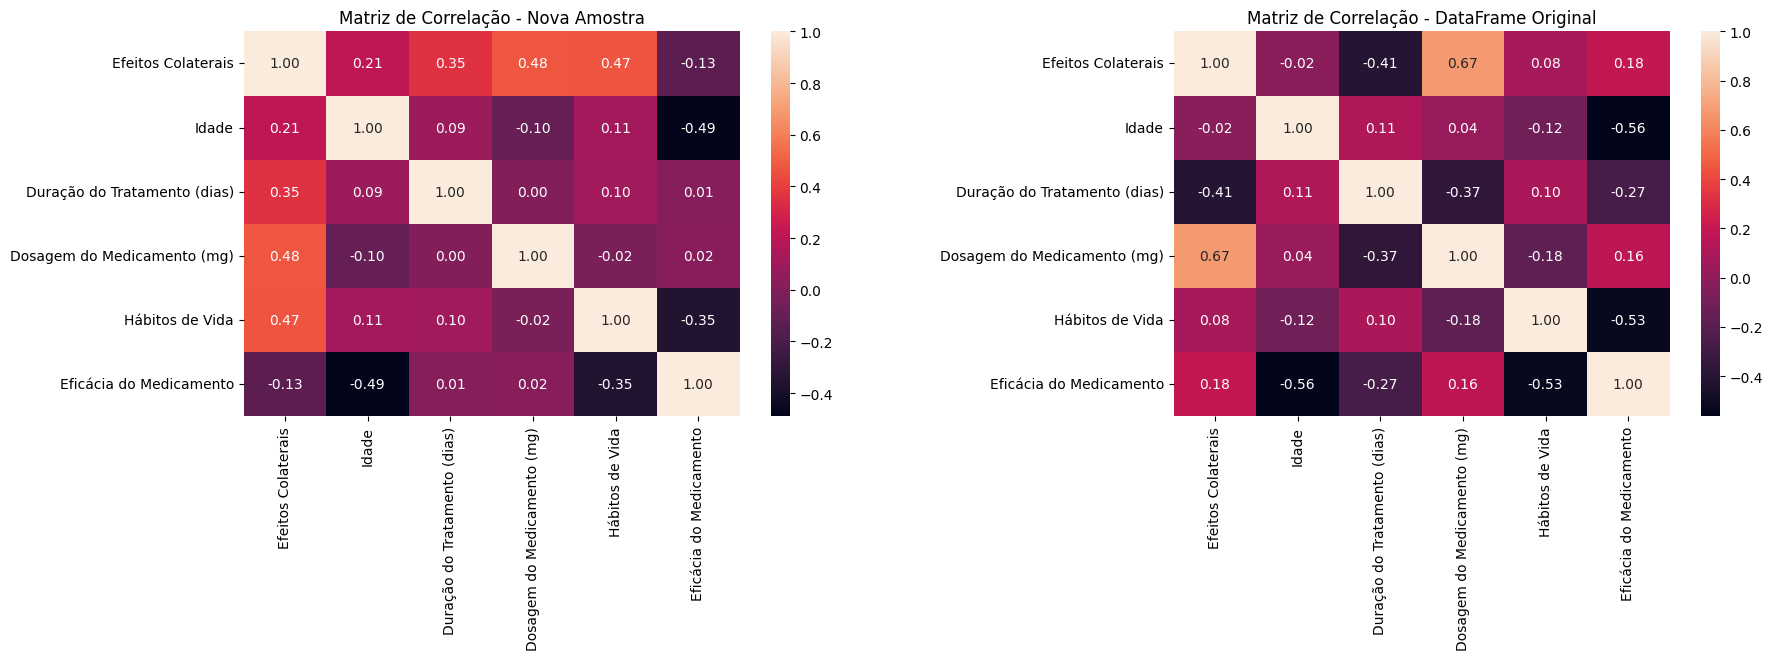

In [38]:
# Análise de correlação dos dados simulados e do DataFrame original 'df'

plt.figure(figsize=(20, 5))

# Gráfico de correlação para a Nova Amostra
plt.subplot(1, 2, 1)
sns.heatmap(df_a.corr(), annot=True, fmt=".2f")
plt.title("Matriz de Correlação - Nova Amostra")

# Gráfico de correlação para o DataFrame 'df' original
plt.subplot(1, 2, 2)
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Matriz de Correlação - DataFrame Original")

plt.subplots_adjust(wspace=0.5)
plt.show()

**Interpretando o Resultado**

**Variações nas Correlações Observadas:** Ao examinar as matrizes de correlação lado a lado, notamos mudanças interessantes na intensidade das relações entre variáveis específicas. A correlação entre 'Idade' e 'Efeitos Colaterais' aumentou para 0.21 na nova amostra, o que pode indicar uma tendência de indivíduos mais velhos a experimentarem efeitos colaterais mais severos, um achado que merece atenção especial em considerações clínicas. Da mesma forma, a correlação ampliada de 0.47 entre 'Hábitos de Vida' e 'Efeitos Colaterais' sugere que práticas de vida mais saudáveis podem ter um papel protetor significativo contra a manifestação de efeitos adversos.

**Análise das Variáveis Chave da Hipótese:** Em relação às variáveis centrais da nossa hipótese, observamos uma diminuição nas correlações: a relação entre 'Dosagem do Medicamento' e 'Efeitos Colaterais' caiu para 0.48, e a associação entre 'Eficácia do Medicamento' e 'Hábitos de Vida' declinou para -0.35. Esses valores mais baixos ainda sustentam a ideia de uma relação substancial, porém indicam que outros fatores podem estar influenciando essas dinâmicas. Essa informação é vital para uma compreensão mais clara das interações medicamentosas e comportamentais.

Análise Probabilística

In [39]:
# Código para calcular as probabilidades condicionais, formatar e substituir valores

def calc_probabilidades(df_a):
    # Agrupando por 'Dosagem do Medicamento (mg)' e 'Efeitos Colaterais', e calculando a probabilidade
    probabilidade = df_a.groupby(['Dosagem do Medicamento (mg)', 'Efeitos Colaterais']).size().div(len(df_a)).reset_index(name='Probabilidade')

    # Substituindo os códigos numéricos pelos valores correspondentes
    efeitos_colaterais_map = {3: 'Graves', 2: 'Moderados', 1: 'Leves', 0: 'Nenhum'}
    probabilidade['Efeitos Colaterais'] = probabilidade['Efeitos Colaterais'].map(efeitos_colaterais_map)

    # Formatando as probabilidades no formato "0.00%"
    probabilidade['Probabilidade'] = (probabilidade['Probabilidade'] * 100).round(2).astype(str) + '%'

    return probabilidade

# Calculando as probabilidades
probabilidades_1 = calc_probabilidades(df_a)
probabilidades_1

,Dosagem do Medicamento (mg),Efeitos Colaterais,Probabilidade
0,50,Nenhum,8.0%
1,50,Leves,9.5%
2,50,Moderados,5.0%
3,50,Graves,1.5%
4,100,Nenhum,10.0%
5,100,Leves,14.5%
6,100,Moderados,8.0%
7,100,Graves,8.0%
8,200,Nenhum,1.0%
9,200,Leves,5.5%


In [40]:
def calc_probabilidades2(df_a):
    # Mapeamento para substituir os valores numéricos pelos descritivos de 'Eficácia do Medicamento'
    eficacia_medicamento_map = {2: 'Alta', 1: 'Moderada', 0: 'Baixa'}
    habitos_vida_map = {0: 'Não Fuma/Não Bebe', 1: 'Bebe', 2: 'Fuma', 3: 'Fuma e Bebe'}

    # Agrupando por 'Hábitos de Vida' e 'Eficácia do Medicamento', e calculando a probabilidade
    probabilidade_2 = df_a.groupby(['Hábitos de Vida', 'Eficácia do Medicamento']).size().div(len(df_a)).reset_index(name='Probabilidade')

    # Ordenando os resultados
    probabilidade_2 = probabilidade_2.sort_values(['Hábitos de Vida', 'Eficácia do Medicamento'])

    # Substituindo os valores numéricos pelos descritivos
    probabilidade_2['Eficácia do Medicamento'] = probabilidade_2['Eficácia do Medicamento'].map(eficacia_medicamento_map)
    probabilidade_2['Hábitos de Vida'] = probabilidade_2['Hábitos de Vida'].map(habitos_vida_map)

    # Formatando as probabilidades no formato "0.00%"
    probabilidade_2['Probabilidade'] = (probabilidade_2['Probabilidade'] * 100).round(2).astype(str) + '%'

    return probabilidade_2

# Calculando as probabilidades para o dataframe df_a
probabilidades_2 = calc_probabilidades2(df_a)
probabilidades_2

,Hábitos de Vida,Eficácia do Medicamento,Probabilidade
0,Não Fuma/Não Bebe,Baixa,0.5%
1,Não Fuma/Não Bebe,Moderada,5.5%
2,Não Fuma/Não Bebe,Alta,11.0%
3,Bebe,Baixa,17.5%
4,Bebe,Moderada,14.5%
5,Bebe,Alta,2.5%
6,Fuma,Baixa,8.0%
7,Fuma,Moderada,14.0%
8,Fuma,Alta,5.0%
9,Fuma e Bebe,Baixa,13.0%


# Etapa 5: Interpretação dos Resultados

Ao avaliar os dados probabilísticos juntamente com as matrizes de correlação do nosso estudo simulado, podemos extrair insights valiosos que apoiam nossa hipótese e revelam uma imagem mais detalhada das relações entre dosagem do medicamento, hábitos de vida, efeitos colaterais e eficácia do tratamento.

**Dosagem e Efeitos Colaterais:**
Observamos um aumento progressivo na probabilidade de efeitos colaterais graves conforme a dosagem do medicamento aumenta, passando de 1,5% na dosagem de 50 mg para impressionantes 16,0% na dosagem de 200 mg. Esta tendência é consistente com a correlação positiva (0,48) observada na matriz de correlação da nova amostra, embora essa correlação seja um pouco menor do que a observada no conjunto de dados original (0,67). Isso reforça a ideia de que, apesar da variabilidade, a dosagem é um fator relevante na incidência de efeitos colaterais.

**Hábitos de Vida e Eficácia do Tratamento:**
Quanto aos hábitos de vida, os dados revelam uma relação inversa entre hábitos menos saudáveis e a eficácia do medicamento. Notavelmente, pacientes que não fumam e não bebem têm uma maior probabilidade de alta eficácia (11,0%), contrastando drasticamente com aqueles que fumam e bebem, onde a alta eficácia cai para 1,5%. Esta descoberta é corroborada pela correlação negativa significativa (-0,35) entre 'Hábitos de Vida' e 'Eficácia do Medicamento' na nova matriz de correlação, que, apesar de ser uma relação mais fraca em comparação com a nossa amostra original (-0,53), ainda sugere que estilos de vida mais saudáveis potencializam a eficácia do tratamento.

As probabilidades calculadas e as correlações observadas coletivamente sustentam a hipótese de que tanto a dosagem quanto os hábitos de vida exercem influências significativas sobre os efeitos colaterais e a eficácia do medicamento, respectivamente. Embora a magnitude dessas influências varie entre as amostras original e simulada, a direção das associações permanece consistente.

Essa análise probabilística e de correlação nos fornece uma base sólida para prever possíveis resultados em pacientes com base em sua dosagem e estilo de vida, permitindo recomendações mais informadas e personalizadas no tratamento. Além disso, abre caminho para pesquisas futuras, onde podemos explorar outras variáveis que possam interagir com a dosagem e os hábitos de vida para influenciar os resultados do tratamento.

# Etapa 6: Conclusão

Ao longo deste estudo, conduzimos uma análise aprofundada da interação entre a dosagem de um medicamento e os efeitos colaterais, assim como dos hábitos de vida e a eficácia do tratamento. Os dados analisados, tanto do conjunto original quanto da amostra simulada, reiteram consistentemente que altas dosagens estão correlacionadas com um aumento na severidade dos efeitos colaterais, e que hábitos de vida saudáveis melhoram a eficácia do medicamento.

As probabilidades condicionais extraídas da nova amostra simulada confirmam que a relação entre a dosagem e os efeitos colaterais não é apenas uma tendência, mas uma realidade estatística com impacto mensurável. Da mesma forma, os hábitos de vida demonstraram ter uma influência marcante na eficácia do tratamento, com padrões claros emergindo entre diferentes estilos de vida e a resposta ao medicamento.

Além dessas variáveis-chave, outros fatores, como a idade dos pacientes e a duração do tratamento, também mostraram ter correlações significativas, oferecendo caminhos adicionais de investigação que podem enriquecer ainda mais nossa compreensão. Por exemplo, a idade teve uma correlação positiva com os efeitos colaterais, sugerindo que pacientes mais velhos podem ser mais vulneráveis a reações adversas. Enquanto isso, a duração do tratamento apresentou uma relação com a incidência de efeitos colaterais que pode indicar um período de adaptação ou um efeito cumulativo do medicamento ao longo do tempo.

Essas descobertas fornecem evidências valiosas que podem ser aplicadas no desenvolvimento de estratégias de dosagem mais seguras e eficazes, na promoção de hábitos de vida mais saudáveis como parte integrante do tratamento e na personalização da terapia farmacológica para grupos específicos de pacientes. A análise apresentada aqui destaca a complexidade da medicina personalizada e a importância de uma abordagem holística na avaliação de tratamentos farmacológicos.

Em conclusão, este trabalho reforça a necessidade de considerar uma gama de variáveis inter-relacionadas ao prescrever e monitorar tratamentos médicos. Ao mesmo tempo, abre novas avenidas de pesquisa e sugere a importância de uma abordagem multidisciplinar para otimizar a eficácia do tratamento e minimizar os riscos associados. As interações entre as variáveis estudadas são um lembrete claro de que na medicina, assim como na análise de dados, o todo é frequentemente mais complexo do que a soma de suas partes.